

# Project: Investigate the Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  The No-show appointments dataset contains the information of over a 100,000 patients in brazil who scheduled appointments with various hospitals in different locations in 2016. It contains information on if the patients showed up for their appointments or not.

> The patients are denoted by the Patient ID, it also contains the ailments they have and whether or not the patient has been enrolled for the Bolsa family brazilian welfare program that gave them access to free healthcare.

> Accross this dataset I will use my current knowledge of data analysis and data wrangling to generate valuable insights from this dataset. My insights should be able to:

> examine the relationship between gender and the propensity to show up for scheduled appointments

> investigate the neighbourhood that has the highest percentage of no-show and the location that had the lowest and examine trends between them.

> study if senior citizens have a higher propensity to adhere to their scheduled appointment than the younger ones

> identify the trends associated with patients who do not-show and those that show-up to appointments.

> explore if patients with scholarships show up more than patients without scholarships.


In [129]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.**

### General Properties

In [130]:
# Load the data and print out a few lines.
def file(arg):
    df1 =pd.read_csv(arg)
    return df1
df = file('noshowappointments-may-2016.csv')

In [131]:
#getting information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **: From my first observation at a glance at the dataset, some of the columns are not stored in the right data type. For example the PatientId column is saved in a float, The AppointmentId is saved as an integer. The Schedule and appointment day columns are stored as strings.**

>**The Scholarship,Hipertension,Diabetes,Alcoholism,Handcap and SMS_recieved columns are stored as integers instead of booleans.**

>**The hipertension column wasn't spelled properly as well as the handcap column.**


In [132]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*There were 110,527 patient recorded in the dataset,The mean age accross the dataset is 37 years.9% of the patients in the dataset had the scholarship of the Bolsa Family healthcare which offered assistance to poor people.32% of the Patients recieved sms. The values of the handcap column seems to have an outlier of 4 it is supposed to be comprising of just 0s and 1s that seems to be a mistake.Also the age column has a minimum value of -1, that can't be right.*
### Data Cleaning (No-show appointments)

In [133]:
# converting columns to their appropriate data types
df['PatientId'] = df['PatientId'].astype('str')
df['AppointmentID'] = df['AppointmentID'].astype('str')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# confirm change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [134]:
# correcting the spellings of the columns in the dataset by renaming them
df.rename(columns ={'Hipertension' : 'Hypertension','Handcap' : 'Handicap','no-show' : 'no_show'},inplace = True)
# converting the columns to lowercase for more uniformity
df.columns = df.columns.str.lower()

In [135]:
# dropping values less than zero in the age column
df.drop(df[df['age']<= 0].index, inplace = True)
# dropping values greater than or equal to 2 
df.drop(df[df['handicap'] >= 2].index,inplace = True)
# confirming changes
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000
mean,38.299294,0.101051,0.203356,0.073978,0.031389,0.019113,0.323426
std,22.453253,0.301397,0.402497,0.261737,0.174368,0.136922,0.467786
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*After cleaning and dropping the rows that were skewed and innacurate we can see that the dataset now has 106,788 patients and 32% received sms and the average age accross the entries is 38 years. 10% of the trimmed dataset had scholarships. *

In [136]:
#printing the first few rows
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Looking at the DataFrame the id columns needs to be renamed so that the can make sense at the first glance.

>Also the patient id column seems to have been represented in decimal it was stored as a float.

>And the boolean columns should also be represented as such.

> For easier analytic process I would represent the no show column as 0 and 1 in a new column

> I will also label the different ages according to different groups

In [137]:
# renaming the columns to make sense
df.rename(columns = {'patientid':'patient_id','appointmentid':'appointment_id','scheduledday' :'scheduled_day','appointmentday':'appointment_day','no-show' :"no_show"},inplace = True)
#fixing the patient_id column by using the apply function nested with the split function to remove the decimal.
df['patient_id'] = df['patient_id'].apply(lambda x : x.split('.')[0])
# converting the columns from int to boolean
df = df.astype({'scholarship':'bool','hypertension' :'bool','diabetes' :'bool','alcoholism':'bool','handicap':'bool','sms_received':'bool'})
#creating a column named No-show that take a zero value when no_show is no and one when no_show is yes
df.loc[:,'No-show'] = df.loc[:,'no_show'].apply(lambda x:0 if x=='No'else 1)
#creating a column that divide various ages in the dataframe to different labels
df.loc[:,'age_section'] = pd.cut(df['age'],bins = [0,18,40,115],labels =['Children','Adult','Seniors'])
# confirm change
df.tail()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,No-show,age_section
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,False,False,False,False,False,True,No,0,Seniors
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,False,False,False,False,False,True,No,0,Seniors
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,False,False,False,False,False,True,No,0,Adult
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,False,False,False,False,False,True,No,0,Adult
110526,377511518121127,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,False,False,False,False,False,True,No,0,Seniors


#### The data looks clean and ready for analysis...

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (what is  the relationship between gender and the propensity to show up for scheduled appointments)

In [138]:
# query to highlight only if the patient is male
df_m = df.query('gender == "M"')
#query to highlight only if the patient is female
df_f = df.query('gender == "F"')

# preview of the Male gender DataFrame...
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36779 entries, 1 to 110515
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   patient_id       36779 non-null  object             
 1   appointment_id   36779 non-null  object             
 2   gender           36779 non-null  object             
 3   scheduled_day    36779 non-null  datetime64[ns, UTC]
 4   appointment_day  36779 non-null  datetime64[ns, UTC]
 5   age              36779 non-null  int64              
 6   neighbourhood    36779 non-null  object             
 7   scholarship      36779 non-null  bool               
 8   hypertension     36779 non-null  bool               
 9   diabetes         36779 non-null  bool               
 10  alcoholism       36779 non-null  bool               
 11  handicap         36779 non-null  bool               
 12  sms_received     36779 non-null  bool               
 13  no_show        

In [139]:
# preview of the female gender Dataframe
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70009 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   patient_id       70009 non-null  object             
 1   appointment_id   70009 non-null  object             
 2   gender           70009 non-null  object             
 3   scheduled_day    70009 non-null  datetime64[ns, UTC]
 4   appointment_day  70009 non-null  datetime64[ns, UTC]
 5   age              70009 non-null  int64              
 6   neighbourhood    70009 non-null  object             
 7   scholarship      70009 non-null  bool               
 8   hypertension     70009 non-null  bool               
 9   diabetes         70009 non-null  bool               
 10  alcoholism       70009 non-null  bool               
 11  handicap         70009 non-null  bool               
 12  sms_received     70009 non-null  bool               
 13  no_show        

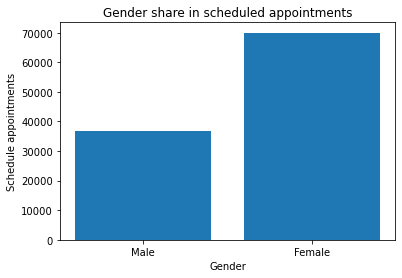

In [140]:
# The total number of males that scheduled appointments
total_m =len(df_m)
# The total number of females that scheduled appointments
total_f = len(df_f)
# The plot of the gender total that scheduled appointments
plt.bar(['Male','Female'],[total_m,total_f])
plt.title('Gender share in scheduled appointments')
plt.xlabel('Gender')
plt.ylabel('Schedule appointments');

*According to the visualization above the Female patients are significantly more than the Male patients in this dataset. I arrived at this insight by plotting the total number of Male patients against the female patients using the bar chart.
I will look to extract more insights about the proportion of the male and female gender respectively that actually show up for their appointment after scheduling.*

In [141]:
# The males that show up for their medical appointment
df_ms = df_m[df_m['no_show'] == 'No']
# The females that show up for their medical appointment
df_fs = df_f[df_f['no_show'] == 'No']

# The number of males that show up for their medical appointment
total_ms = len(df_ms)
#The number of females that show up for their medical appointment
total_fs = len(df_fs)


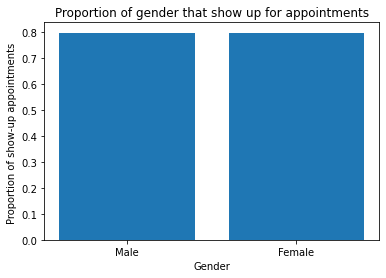

In [142]:
# The proportion of males that show up for their appointment
prop_ms = total_ms / total_m 
# The proportion of males that show up for their appointment
prop_fs = total_fs / total_f
# The plot of the gender total that schedule appointments
plt.bar(['Male','Female'],[prop_ms,prop_fs])
plt.title('Proportion of gender that show up for appointments')
plt.xlabel('Gender')
plt.ylabel('Proportion of show-up appointments ');

*The barchart above shows the proportion of Male and female patient that show up for their scheduled appointment on the appointment day. From the visualization above we can deduce that there is only a very minimal difference in the propensity of the gender share to show-up for appointments.*

### Research Question 2  (What neighbourhood has the highest percentage of no-show ? what location that had the lowest percentage of no-show?  Are there any significant distinct trends between them?)

In [143]:
# the total number of patients
total_df = len(df)
# query of patients that showed up to their appointments
df_s = df.query('no_show == "No"')
# query of patients that did not show up to their appointments
df_n = df.query('no_show == "Yes"')
# the total number of patients that showed up to their appointments
df_show = len(df_s)
# the total number of patients that did not show up to their appointments
df_no = len(df_n)


*Now I want to find the neighbourhood that had the highest number of No-shows to schedule appointments.*

In [144]:
# using group by to group the patients that did not show up to their appointments by neighbourhood and counting the number of no-shows 
df_location = df_n.groupby('neighbourhood').agg({'no_show':"count"})
# using group by to group the patients that scheduled appointments by neighbourhood
df_ls = df.groupby('neighbourhood').agg({"no_show": "count"})
# examining the dataframe
df_location.head()


,no_show
neighbourhood,
AEROPORTO,1
ANDORINHAS,508
ANTÔNIO HONÓRIO,45
ARIOVALDO FAVALESSA,61
BARRO VERMELHO,91


In [145]:
# printing the location with the highest and lowest number of no-show to appointments
print(df_location.max(),df_location.min())
# query where no-show is highest
df_location.query('no_show == 1432')

no_show    1432
dtype: int64 no_show    1
dtype: int64


,no_show
neighbourhood,
JARDIM CAMBURI,1432


*Jaardim Camburi had the highest amount of no-shows after scheduled appointments.*

In [146]:
df_location.query('no_show == 1')

,no_show
neighbourhood,
AEROPORTO,1


*Aeroporto had the lowest number of no-shows recording only one in the neighbourhood. Now we want to get the percentage of patients in each neighbourhood that didn't show up for their appointments.*

In [147]:
# assigning the list of all neighbourhood with no-show to loc_uniq
loc_uniq = df_n['neighbourhood'].unique()
#printing the number of unique values in the neighbourhood column
print(df_n['neighbourhood'].nunique())

80


*We have 80 different neighbourhoods that had atleast one no-show up to their appointments.
Now I want to create a DataFrame to store the percentage of patients that missed their appointment after scheduling them.*

In [148]:
no_showrate =  df.groupby('neighbourhood').mean().loc[:,'No-show']


In [149]:
# sorting the values by no-show percentage in ascending order
no_showrates =no_showrate.sort_values()
#examining the no_showrate
no_showrates

neighbourhood
PARQUE INDUSTRIAL              0.000000
ILHA DO BOI                    0.085714
AEROPORTO                      0.125000
MÁRIO CYPRESTE                 0.144414
SOLON BORGES                   0.148230
                                 ...   
ITARARÉ                        0.263142
SANTA CLARA                    0.266667
SANTA CECÍLIA                  0.270880
SANTOS DUMONT                  0.291901
ILHAS OCEÂNICAS DE TRINDADE    1.000000
Name: No-show, Length: 81, dtype: float64

*The "PARQUE INDUSTRIAL" neighbourhood has the lowest percentage of patients that didn't show up for their appointment with 0% it seems off and i will investigate below. The "ILHAS OCEÂNICAS DE TRINDADE" has a 100% no-show percentage which also seems off as the next is "Santos DUMONT" WITH 29.19%. So i'm going to examine the neighbourhood further.* 

In [150]:
# query for where neighbourhood is ILHAS OCEÂNICAS DE TRINDADE
df.query('neighbourhood == "ILHAS OCEÂNICAS DE TRINDADE"')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,No-show,age_section
48754,534986855114,5583947,F,2016-04-14 12:25:43+00:00,2016-05-13 00:00:00+00:00,51,ILHAS OCEÂNICAS DE TRINDADE,False,False,False,False,False,False,Yes,1,Seniors
48765,7256429752481,5583948,F,2016-04-14 12:26:13+00:00,2016-05-13 00:00:00+00:00,58,ILHAS OCEÂNICAS DE TRINDADE,False,False,False,False,False,False,Yes,1,Seniors


*The "ILHAS OCEÂNICAS DE TRINDADE" just has 2 entries in the dataset that didn't show up for their appointment, it will be therefore not reliable to denote trends from it and compare with the other neighbourhoods. So I am going to drop it from my DataFrame and use the next highest neighbourhood, Santos Dumont.* 

In [151]:
# dropping the neighbourhood from the dataframe
no_showrates.drop('ILHAS OCEÂNICAS DE TRINDADE',axis = 0,inplace = True)


In [152]:
df.query('neighbourhood == "PARQUE INDUSTRIAL"')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,No-show,age_section
75199,8255992453538,5663947,F,2016-05-05 10:48:59+00:00,2016-05-05 00:00:00+00:00,17,PARQUE INDUSTRIAL,False,False,False,False,False,False,No,0,Children


The PARQUE INDUSTRIAL just has one entry in the dataset that didn't show up for their appointment, it will be therefore not reliable to denote trends from it and compare with the other neighbourhoods. So I am going to drop it from my grouped data.

In [153]:
# dropping the neighbourhood from the dataframe
no_showrates.drop('PARQUE INDUSTRIAL',axis = 0,inplace = True)

*Below I will be plotting an horizontal barchart that depicts the percentage of top and least 20 neighbourhoods thatpatients that didn't show up for their appointments.*

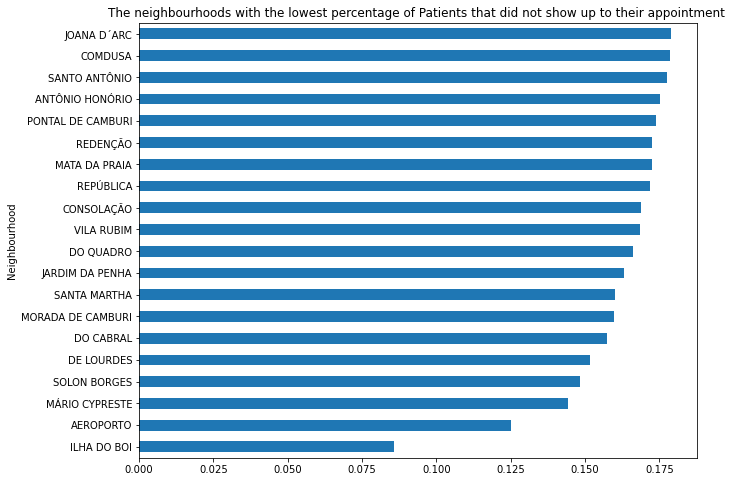

In [154]:
#plotting the neighbourhoods with the lowest no-show rate
no_showrates[:20].plot(kind='barh',figsize=(10,8),title = "The neighbourhoods with the lowest percentage of Patients that did not show up to their appointment ",xlabel='Neighbourhood' );

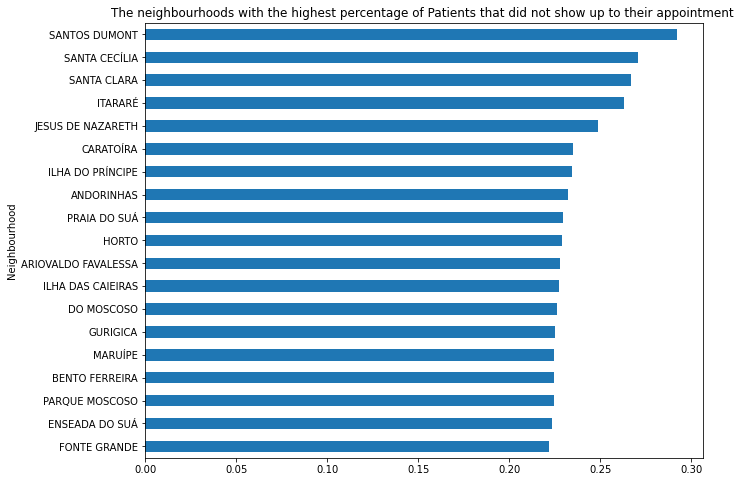

In [155]:
#plotting the neighbourhoods with the highest no-show rates
no_showrates[60:81].plot(kind='barh',figsize=(10,8),title = "The neighbourhoods with the highest percentage of Patients that did not show up to their appointment ",xlabel='Neighbourhood' );

*Now according to the charts above the "ILHA DO BOI" had the lowest percentage of no-show ups and the "SANTOS DUMONT" had the highest percentage of No-show. Now I will examine the trends amongst this 2 neighbourhoods. starting with the age.*


In [156]:
#Query for Santos Dumont neighbourhood in the dataset
Santos_Dumont = df.query('neighbourhood == "SANTOS DUMONT"')
#Query for iLhasdoboi neighbourhood in the dataset
Ilha_do_Boi = df.query('neighbourhood == "ILHA DO BOI"')
#Using describe to get the average age and the number of entries
Santos_Dumont.describe()

,age,No-show
count,1247.000000,1247.000000
mean,38.541299,0.291901
std,22.426331,0.454819
min,1.000000,0.000000
25%,20.000000,0.000000
50%,39.000000,0.000000
75%,57.000000,1.000000
max,95.000000,1.000000


There are 1247 patients in Santos Dumont and the average age is 38.54 years.Now we want to examine the trend of neighbourhoods accross different variables, like the ailment admitted for also if they were sent more than one sms.

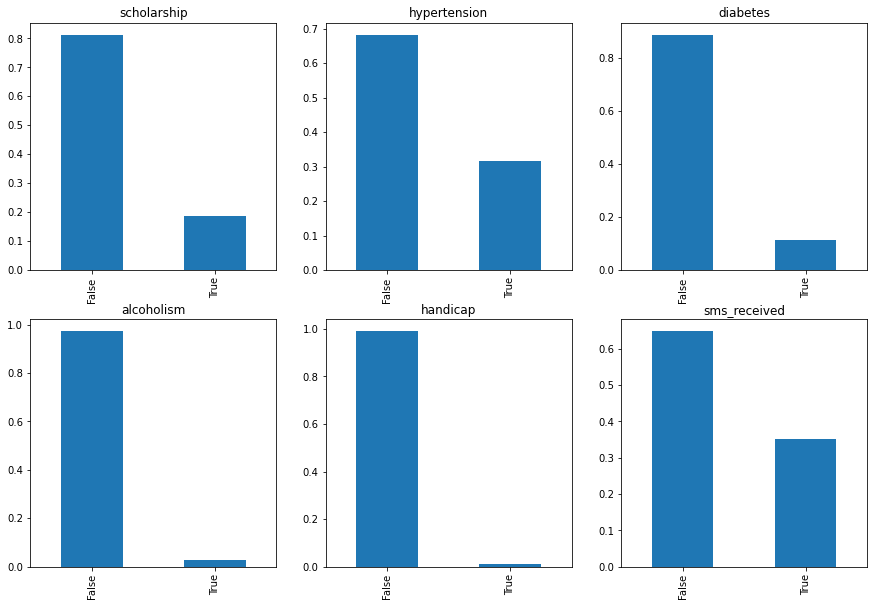

In [157]:
# the size of the figure
fig = plt.figure(figsize=(15,10)) 
#figure dimension of the plot
fig_dims = (2, 3)


# Plot the trends at Santos Dumont using the proportion of True or False
plt.subplot2grid(fig_dims, (0, 0))
Santos_Dumont['scholarship'].value_counts(normalize = True).plot(kind='bar', 
                                     title='scholarship')
plt.subplot2grid(fig_dims, (0, 1))
Santos_Dumont['hypertension'].value_counts(normalize =True).plot(kind='bar', 
                                     title='hypertension')
plt.subplot2grid(fig_dims, (0, 2))
Santos_Dumont['diabetes'].value_counts(normalize =True).plot(kind='bar', 
                                     title='diabetes')
plt.subplot2grid(fig_dims, (1, 0))
Santos_Dumont['alcoholism'].value_counts(normalize =True).plot(kind='bar', 
                                     title='alcoholism')
plt.subplot2grid(fig_dims, (1,1))
Santos_Dumont['handicap'].value_counts(normalize =True).plot(kind='bar', 
                                     title='handicap')
plt.subplot2grid(fig_dims, (1,2))
Santos_Dumont['sms_received'].value_counts(normalize =True).plot(kind='bar', 
                                     title='sms_received');

*A stand out trend for people in Santos Dumont is their hypertensiveness a little over 30% of the Patients that scheduled appointments were hypertensive. A little under 20% had scholarships and access to free health care. 35% of patients in Santos Dumont recieved sms notifications from the hospital about their appointment. The mean age of people in Santos-Durmont is 38.54 years , this is significantly young an must have accrued to their high percentage of no-show.*

In [158]:
#Using describe to get the average age and the number of entries
Ilha_do_Boi.describe()

,age,No-show
count,35.000000,35.000000
mean,48.628571,0.085714
std,18.384913,0.284029
min,20.000000,0.000000
25%,32.000000,0.000000
50%,57.000000,0.000000
75%,64.500000,0.000000
max,74.000000,1.000000


There are 35 patients from the Ilha Do Boi neighbourhood and the average age is 48.62 years.

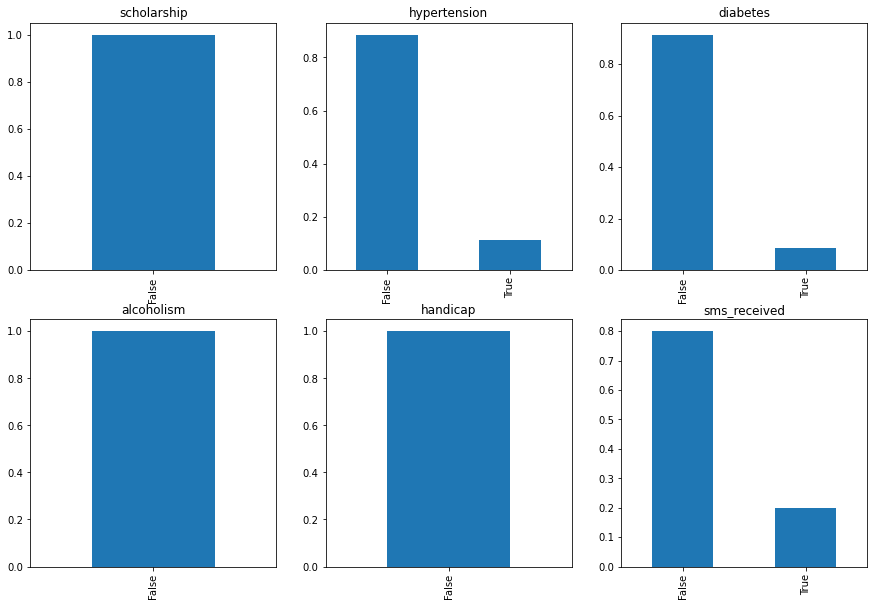

In [159]:
# the size of the figure
fig = plt.figure(figsize=(15,10)) 
#figure dimensions of the plot
fig_dims = (2, 3)
# Plot the trends at Ilhas Do Boi using the proportion of True or False
plt.subplot2grid(fig_dims, (0, 0))
Ilha_do_Boi['scholarship'].value_counts(normalize = True).plot(kind='bar', 
                                     title='scholarship')
plt.subplot2grid(fig_dims, (0, 1))
Ilha_do_Boi['hypertension'].value_counts(normalize =True).plot(kind='bar', 
                                     title='hypertension')
plt.subplot2grid(fig_dims, (0, 2))
Ilha_do_Boi['diabetes'].value_counts(normalize =True).plot(kind='bar', 
                                     title='diabetes')
plt.subplot2grid(fig_dims, (1, 0))
Ilha_do_Boi['alcoholism'].value_counts(normalize =True).plot(kind='bar', 
                                     title='alcoholism')
plt.subplot2grid(fig_dims, (1,1))
Ilha_do_Boi['handicap'].value_counts(normalize =True).plot(kind='bar', 
                                     title='handicap')
plt.subplot2grid(fig_dims, (1,2))
Ilha_do_Boi['sms_received'].value_counts(normalize =True).plot(kind='bar', 
                                     title='sms_received');

*A stand out trend for people in Ilhas Do Boi is their average age is 48.63 years they are significantly older than people in Santos Durmont. No one had scholarships and access to free health care. 20% of patients in Ilhas Do Boi recieved sms notifications from the hospital about their appointment.*

### Research Question 3(Are senior citizens more likely to adhere to scheduled appointments than the younger ones?)

I want to bring out insights to find out if the age of patients is a factor when determining if they will show up or not. I will filter the data set approprately and find the proportion of those that didn't show up in each age group. With the seniors being 41 and above, Adults being from 18-40 years and children classified as 17 and under.

In [160]:
df.groupby('age_section').mean().loc[:,'No-show']

age_section
Children    0.225514
Adult       0.231905
Seniors     0.172304
Name: No-show, dtype: float64

*We can further deduce according to the findings patients from 18-40 who are classifed as adults have the highest no-show rates and senior citizens have the lowest no-show rate.*

### Research Question 4( What are the trends associated with patients who do not-show and those that show-up to appointments?)

In [161]:
#number of entries in the dataframe
total_df = len(df)
# filtering the show-up and no-show
df_s = df.query('no_show == "No"')
df_n = df.query('no_show == "Yes"')
# total number of the no-show and show-up dataframe
df_show = len(df_s)
df_no = len(df_n)


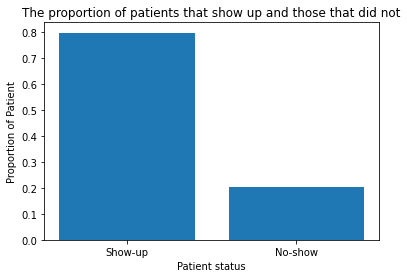

In [162]:
# proportion of the patients that show up and did not show up
prop_s = df_show / total_df
prop_n = df_no / total_df
#plotting the bar-chart 
plt.bar(['Show-up','No-show'],[prop_s,prop_n])
plt.title('The proportion of patients that show up and those that did not')
plt.xlabel('Patient status')
plt.ylabel('Proportion of Patient');

*About 80% of the patients that scheduled appointments showed up to their appointment and 20 % defaulted. Now we want to examine the trends accross ailments and scholarship and sms recieved within patients that do not show up and those that do.*


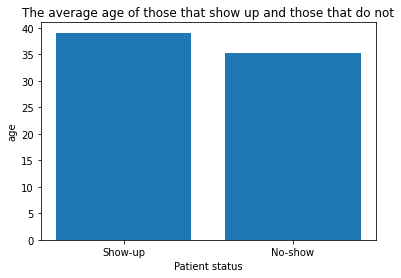

In [163]:
# mean age of those that don't show up and those that do
age_no= df_n['age'].mean()
age_yes =df_s['age'].mean()

#plotting the bar-chart 
plt.bar(['Show-up','No-show'],[age_yes,age_no])
plt.title('The average age of those that show up and those that do not')
plt.xlabel('Patient status')
plt.ylabel('age');

*Patients that do not show up for appointments are younger than those that do. So I would examine the trends amongst other factors for those patients that show up for appointment and those that do not.*

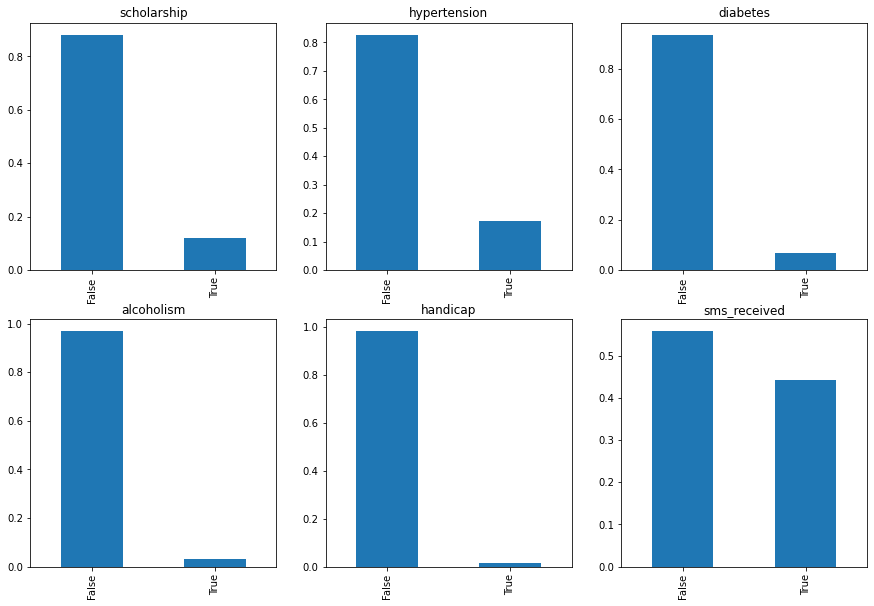

In [164]:
# the size of the figure
fig = plt.figure(figsize=(15,10)) 
#figure dimensions of the plot
fig_dims = (2, 3)


 # Plot the trends of no-show using the proportion of True or False
plt.subplot2grid(fig_dims, (0, 0))
df_n['scholarship'].value_counts(normalize = True).plot(kind='bar', 
                                     title='scholarship')
plt.subplot2grid(fig_dims, (0, 1))
df_n['hypertension'].value_counts(normalize =True).plot(kind='bar', 
                                     title='hypertension')
plt.subplot2grid(fig_dims, (0, 2))
df_n['diabetes'].value_counts(normalize =True).plot(kind='bar', 
                                     title='diabetes')
plt.subplot2grid(fig_dims, (1, 0))
df_n['alcoholism'].value_counts(normalize =True).plot(kind='bar', 
                                     title='alcoholism')
plt.subplot2grid(fig_dims, (1,1))
df_n['handicap'].value_counts(normalize =True).plot(kind='bar', 
                                     title='handicap')
plt.subplot2grid(fig_dims, (1,2))
df_n['sms_received'].value_counts(normalize =True).plot(kind='bar', 
                                     title='sms_received');

*An intresting insight above shows that amongst Patients that didn't show over 40% of them recieved sms and a little under 20% had scholarships.*

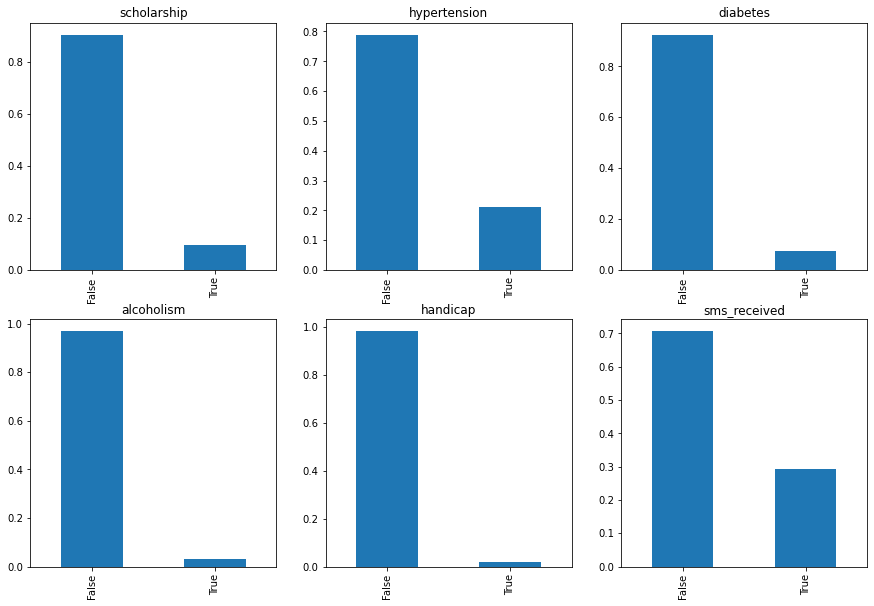

In [165]:
# the size of the figure
fig = plt.figure(figsize=(15,10)) 
#figure dimensions of the plot
fig_dims = (2, 3)


# Plot the trends of show-up using the proportion of True or False
plt.subplot2grid(fig_dims, (0, 0))
df_s['scholarship'].value_counts(normalize = True).plot(kind='bar', 
                                     title='scholarship')
plt.subplot2grid(fig_dims, (0, 1))
df_s['hypertension'].value_counts(normalize =True).plot(kind='bar', 
                                     title='hypertension')
plt.subplot2grid(fig_dims, (0, 2))
df_s['diabetes'].value_counts(normalize =True).plot(kind='bar', 
                                     title='diabetes')
plt.subplot2grid(fig_dims, (1, 0))
df_s['alcoholism'].value_counts(normalize =True).plot(kind='bar', 
                                     title='alcoholism')
plt.subplot2grid(fig_dims, (1,1))
df_s['handicap'].value_counts(normalize =True).plot(kind='bar', 
                                     title='handicap')
plt.subplot2grid(fig_dims, (1,2))
df_s['sms_received'].value_counts(normalize =True).plot(kind='bar', 
                                     title='sms_received');

*An intresting insight above shows that amongst Patients that showed up for their appointment a little over 30% of them recieved sms and a little only 9% had scholarships.*

### Research question 5 (Do people with scholarships show up more than those without?)

In [166]:
df.groupby('scholarship').mean().loc[:,'No-show']

scholarship
False    0.198642
True     0.238161
Name: No-show, dtype: float64

*So according to the findings above we can deduce that patients with scholarships have a no-show rate of 23.81% tend to miss appointments more than patients without scholarships who have a no-show rate of 19.86%.*

<a id='conclusions'></a>
## Conclusions



After careful exploratory analysis, i was able to pull out insights from the No-showappointment dataset to answer the questions posed in the introduction. 

During my research i was able to conclude that women are almost 2x likely to schedule appointment than men in brazil,although when creating study patterns around the no-show rates there is sa striking similarity and no distinct difference in their tendency to show up for medical appointments.

I also observed that the Jardim Camburi neighbourhood had the highest amount of patients that didn't show up but that was testament to the size, after carefully drafting an analysis to preview the percentage of No-shows Santos Durmont neighbourhood had the highest no-show rate. The Ilhas Do Boi neighbourhood had the least perecntage of No-show and when compared with the Santos Durmont the mean ages at Ilhas Do Boi neighbourhood were much older.

I deduced that 80% of Patients actually follow up with their scheduled appointment and 20% do not show-up for that appointment. 

I discovered a pattern that the strongest factor when predicting if a Patient will show up is the age of the patient. Neighbourhoods with older people had a lower no-show rate than Neighbourhoods with younger people. Also senior citizens in brazil have a way lesser no-show rate than younger citizens in brazil. Also the average age of patients that didn't show up is significantly younger than the average age of Patients that did.

Finally Patients with scholarships or free access to healthcare have more propensity to not show up than patients without and this could be as a result of the money factor, patients that paid for the health care wouldn't want to take their appointments for granted. Although this tentative as it wasn't stated if the payments were made before the appointment or after the appointment.


**Limitations to study**

Lack of information: A lot more information should have been recorded accross the ailments columns for example the patients were limited to fewer ailments. This denied me the ability to get the clearer picture

Limitation of dataset to only counts : Most of the dataset was factored around counting only the age column had proper insightful data.

Rigidity: The rigidity of the dataset didn't give me the avenue to test my flexibility through manipulations.

Iconsistent values across the dataset 

There is a need of some other variables that inform with further characteristics or even a need to run statistical tests to estimate the confidence of the conclusions obtained.




### Refrences

>Stackoverflow : https://stackoverflow.com/questions/31303417/python-pandas-dataframe-group-by-based-on-a-condition

>GeekforGeek:https://www.geeksforgeeks.org/how-to-change-the-size-of-figures-drawn-with-matplotlib/#:~:text=Syntax%20of%20matplotlib.&text=The%20figsize%20attribute%20is%20a,of%2080%20x%2080%20pixels.

>W3schools :https://www.geeksforgeeks.org/how-to-change-the-size-of-figures-drawn-with-matplotlib/#:~:text=Syntax%20of%20matplotlib.&text=The%20figsize%20attribute%20is%20a,of%2080%20x%2080%20pixels.

>Pandas pydata.org :https://pandas.pydata.org/docs/reference/api/pandas.Series.drop.html
